In [19]:
import cv2
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import numpy as np
import os
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
# defining feature extractor that we want to use
extractor_sift = cv2.xfeatures2d.SIFT_create()
extractor_orb = cv2.ORB_create()

def features_sift(image, extractor_sift):
    keypoints_sift, descriptors_sift = extractor_sift.detectAndCompute(image, None)
    return keypoints_sift, descriptors_sift
def features_orb(image,extractor_orb):
    keypoints_orb, descriptors_orb = extractor_orb.detectAndCompute(image, None)
    return keypoints_orb, descriptors_orb
    

In [21]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(kmeans.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [22]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [23]:
images=[]

path='F:\Masters UoR\Semester 1\ACV\Assignment 05\Images'

for rnir, dnir, fnir in os.walk(path):
    for filenir in fnir:
        if '.jpg' in filenir:
            images.append(os.path.join(rnir, filenir))

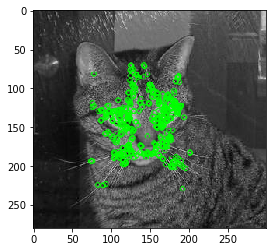

(<matplotlib.image.AxesImage at 0x1dbe428ccc0>, None)

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(images[0],0)

# Initiate STAR detector
orb = cv2.ORB()

# find the keypoints with ORB


orb = cv2.ORB_create()        # Initiate SIFT detector

# find the keypoints and descriptors with SIFT
kp, des = orb.detectAndCompute(img, None)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,img,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

In [25]:
descriptor_list_sift= []
descriptor_list_orb= []
keypoint_list_sift= np.array([])
keypoint_list_orb= np.array([])
x=[]
for i in images:
    image = cv2.imread(i,0)
    x.append(image)
    keypoint_sift, descriptor_sift = features_sift(image, extractor_sift)
    print(descriptor_sift.shape)
    descriptor_list_sift.append(descriptor_sift)
    keypoint_list_sift=np.append(keypoint_list_sift,keypoint_sift)
    keypoint_orb, descriptor_orb = features_orb(image, extractor_orb)
    descriptor_list_orb.append(descriptor_orb)
    keypoint_list_orb=np.append(keypoint_list_orb,keypoint_orb)
descriptors = descriptor_list_sift[0][1]
#print((descriptor_list_orb[0]))
desorb = descriptor_list_orb[0][1]
#print(desorb[1:])
for des in descriptor_list_orb:
    desorb=np.vstack((desorb,des))
for descriptor in descriptor_list_sift[1:]:
    descriptors = np.vstack((descriptors, descriptor))  

(605, 128)
(1340, 128)
(703, 128)
(768, 128)
(508, 128)
(60, 128)
(353, 128)
(952, 128)
(671, 128)
(926, 128)
(909, 128)
(652, 128)
(1722, 128)
(715, 128)
(291, 128)
(1287, 128)
(1170, 128)
(452, 128)
(165, 128)
(126, 128)
(713, 128)
(625, 128)
(280, 128)
(1601, 128)
(483, 128)
(1551, 128)
(989, 128)
(544, 128)
(2832, 128)
(1353, 128)
[[220  92  60 ...  49  36  82]
 [230 226  45 ...   8 150 171]
 [188  92 108 ... 121 100 178]
 ...
 [ 92 132 252 ... 248  45  42]
 [ 87 100  10 ... 115 187  20]
 [247 101 140 ...  51 186  20]]
[226  45 178 172  89 216 236 130 190 177 184 135   8 208 187 137 213 253
  83 124 111 234  16 155 209 253 253  84   8 150 171]


In [26]:
descriptors.shape
descriptors.shape

(24742, 128)

In [63]:
# Perform k-means clustering
k = 100  # Number of clusters
kmeans = KMeans(k).fit(descriptors)
#means=kmeans.fit(descriptors)
preprocessed_image = []
for i in images:
    image = cv2.imread(i,0)
    keypoint, descriptor = features_sift(image, extractor_sift)
    if (descriptor is not None):
        histogram = build_histogram(descriptor, kmeans)
        preprocessed_image.append(histogram)


In [98]:
data1 = cv2.imread(images[5],0)
keypoint, descriptor = features_sift(data1, extractor_sift)
histogram = build_histogram(descriptor, kmeans)
neighbor = NearestNeighbors(n_neighbors = 2)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(preprocessed_image,preprocessed_image)
neighbor.fit(preprocessed_image)
dist, result = neighbor.kneighbors([histogram])

In [99]:
print(neighbor.kneighbors([histogram]))

(array([[ 0.        , 16.91153453]]), array([[ 5, 19]], dtype=int64))


In [100]:
#y_pred = classifier.predict(histogram)
y_pred = result

In [101]:
print(y_pred)
d=y_pred.max()
x=y_pred.max()
index=np.where(y_pred[0] == x)
print('Its ',index[0]+1,'class')

[[ 5 19]]
Its  [2] class


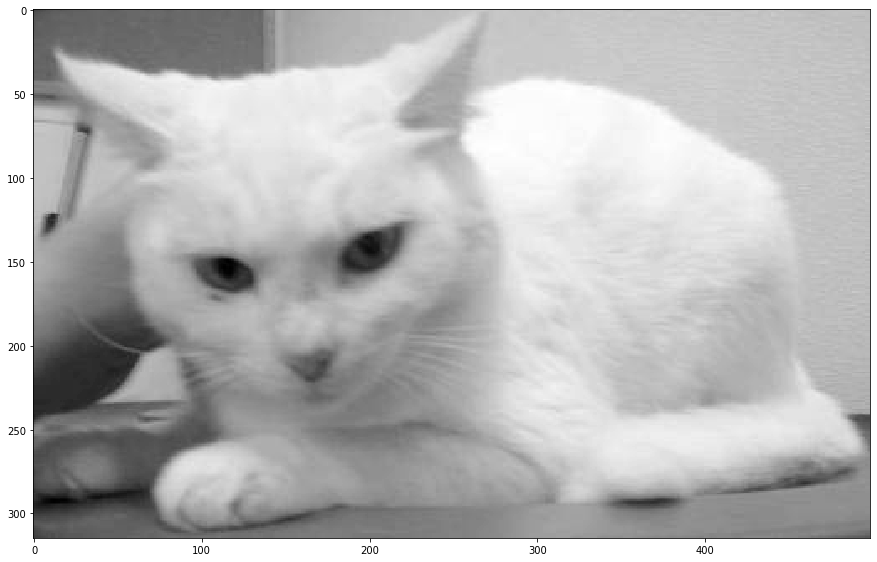

In [102]:
display(data1)

In [ ]:
orb = cv2.ORB_create(nfeatures=1500)